# Initial Data Exploration

This notebook explores our datasets and sets a precedent on how to use our pipelines

## Imports

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%cd ..

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/williamglazer/Documents/school/projet/IFT6759_B_H23


In [92]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing import Pipeline
from darts.dataprocessing.transformers import Scaler
from darts.models import NaiveMean, LinearRegressionModel
from darts.metrics import mape

In [37]:
DATA_PATH = 'data/raw/exchange_rate/exchange_rate.txt'

## Loading the data

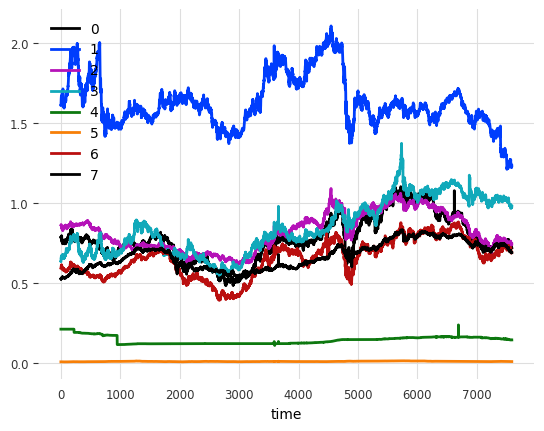

In [57]:
series = TimeSeries.from_csv(DATA_PATH, header=None)
series.plot()

## Preprocessing

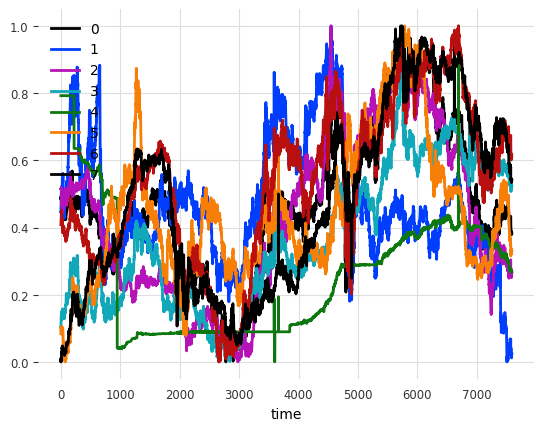

In [58]:
transforms = [
    Scaler()
]
pipeline = Pipeline(transforms)

transformed = pipeline.fit_transform(series)
transformed.plot()

## Predictions

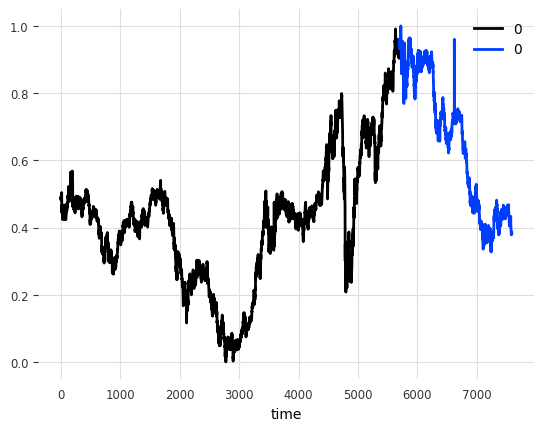

In [103]:
# Get single component
train, test = transformed.univariate_component(0).split_before(0.75)

train.plot()
test.plot()

In [104]:
model = LinearRegressionModel(lags=3)
model.fit(train)

## Evaluations

model LinearRegression(lags={'target': [-3, -2, -1]}) obtains MAPE: 12.20%


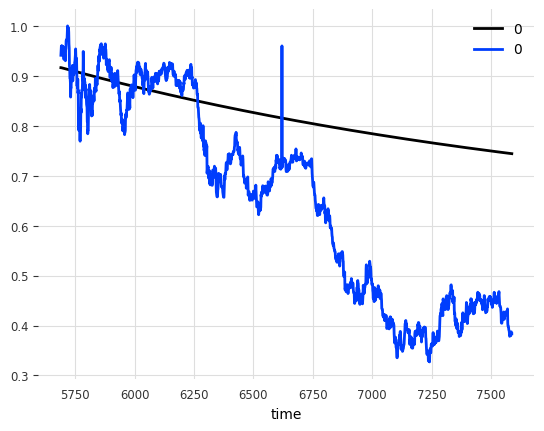

In [105]:
forecast = model.predict(len(test))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(test+1, forecast+1)))

forecast.plot()
test.plot()